In [89]:
%matplotlib inline

import numpy as np # NUMPY
import pandas as pd # PANDAS
import matplotlib.pyplot as plt # MATPLOTLIB
import seaborn as sns # SEABORN
import scipy
import sklearn
import random as rd
from sklearn.decomposition import PCA
from IPython.display import display
import os 
from pathlib import Path
import shutil 
import cv2

## Vamos  a sacar el atributo de estructura (b_structure) de este notebook. 

### Para eso utilizamos los landmarks alineados e imagenes warpeadas que alinee en la parte de forma.

### Por un lado obtenemos los 21 features que corresponden a la forma (17) y los que además usan la textura(4), para los 21 features, estos los sacamos unicamente para los frames0.

### Por otro lado, para todas las imagenes sacamos su diferencia de emocion. 

### Luego de tener ambas, juntamos los features para cada imagen, y hacemos PCA con estos

### Vamos a sacar los  17 primeros landmarks--lo  hacemos de la frame 0  de cada secuencia



In [90]:
my_data = pd.read_csv('transformed_landmarks_procustres_total.csv',header = None)
my_data

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,258.213310,261.555230,267.978110,276.750350,290.519880,310.564040,332.520560,363.126800,397.902110,430.614910,...,399.276060,381.071370,361.327690,343.845490,342.421360,344.785120,356.986140,367.246760,371.105790,367.883230
1,258.260079,261.597406,268.016403,276.783427,290.547142,310.591197,332.539137,363.130286,397.902328,430.608304,...,399.365256,381.114874,361.348807,343.819469,342.387214,344.761274,357.004890,367.318464,371.202325,367.961851
2,258.260079,261.597406,268.016403,276.783427,290.547142,310.591197,332.539137,363.130286,397.902328,430.608304,...,399.365256,381.114874,361.348807,343.819469,342.387214,344.761274,357.004890,367.318464,371.202325,367.961851
3,258.180526,261.525672,267.951280,276.727163,290.500783,310.545016,332.507530,363.124348,397.901963,430.619539,...,399.213509,381.040850,361.312874,343.863722,342.445298,344.801846,356.972986,367.196473,371.038097,367.828110
4,257.731806,261.121102,267.584058,276.409971,290.239485,310.284590,332.329299,363.091027,397.899820,430.682774,...,398.354396,380.621481,361.109119,344.113637,342.773430,345.030917,356.792047,366.505904,370.108661,367.071109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,262.385668,261.062593,266.861863,273.905367,280.123096,297.593762,326.445073,361.495379,398.277240,435.267238,...,382.551530,377.499012,358.141953,345.109024,345.145549,345.665832,354.898678,365.431509,368.794873,369.979998
579,262.459289,261.098531,266.925632,273.945526,280.136290,297.623928,326.464264,361.513025,398.281893,435.260389,...,382.492036,377.440158,358.135715,345.078815,345.125768,345.676078,354.905526,365.450687,368.767366,369.982708
580,262.346649,261.055020,266.834543,273.898203,280.120631,297.541858,326.397965,361.458747,398.250373,435.267297,...,382.482054,377.545025,358.167304,345.151649,345.217583,345.715374,354.863787,365.350292,368.692327,369.956275
581,262.326839,261.042689,266.813314,273.890577,280.132540,297.586126,326.448584,361.489296,398.281757,435.275927,...,382.789229,377.648590,358.193143,345.063979,345.084160,345.576679,354.930971,365.574745,369.051948,370.137988


In [91]:
cant_frames_per_seq = pd.read_csv('ckmock_landmark_FramePerSeq.csv',header = None)
cant_frames_per_seq =np.asarray(cant_frames_per_seq).flatten()

In [41]:
cant_frames_per_seq[0]

16

In [42]:
### Aca tenemos que guardarnos cada frame0

In [125]:

subjects_images = '../ck+warped'

first_images = []
first_frames = []
total = 0
first_frames.append(my_data.iloc[total])#first frame of first secuence
first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')

for i in range(0, len(cant_frames_per_seq)-1):
    total = total+cant_frames_per_seq[i]
    first_frames.append(my_data.iloc[total])
    first_images.append(subjects_images + '/' + 'warped_image_procustres_' + str(total)+ '.png')


first_frames = np.asarray( first_frames, dtype=object)   
first_images = np.asarray( first_images, dtype=object)   

In [129]:
first_images

array(['../ck+warped/warped_image_procustres_0.png',
       '../ck+warped/warped_image_procustres_16.png',
       '../ck+warped/warped_image_procustres_38.png',
       '../ck+warped/warped_image_procustres_52.png',
       '../ck+warped/warped_image_procustres_73.png',
       '../ck+warped/warped_image_procustres_93.png',
       '../ck+warped/warped_image_procustres_106.png',
       '../ck+warped/warped_image_procustres_125.png',
       '../ck+warped/warped_image_procustres_141.png',
       '../ck+warped/warped_image_procustres_161.png',
       '../ck+warped/warped_image_procustres_178.png',
       '../ck+warped/warped_image_procustres_192.png',
       '../ck+warped/warped_image_procustres_215.png',
       '../ck+warped/warped_image_procustres_237.png',
       '../ck+warped/warped_image_procustres_248.png',
       '../ck+warped/warped_image_procustres_261.png',
       '../ck+warped/warped_image_procustres_281.png',
       '../ck+warped/warped_image_procustres_309.png',
       '../ck+war

In [126]:

intercalated_first_frames = []
for fframe in first_frames:
    xaxis = fframe[0: int(len(first_frames[0])/2)]
    yaxis = fframe[int(len(first_frames[0])/2):len(first_frames[0])]
    lan =[]
    for (a, b) in zip(xaxis, yaxis):
        lan.append(np.asarray([a,b]))        
    intercalated_first_frames.append( np.asarray(lan))
intercalated_first_frames = np.asarray(intercalated_first_frames)

In [127]:
intercalated_first_frames.shape

(32, 68, 2)

In [128]:
first_frame = intercalated_first_frames

In [96]:
first_frame[0]

array([[258.21331, 235.46651],
       [261.55523, 270.38882],
       [267.97811, 304.70225],
       [276.75035, 339.07949],
       [290.51988, 370.89977],
       [310.56404, 399.76081],
       [332.52056, 427.81513],
       [363.1268 , 443.66015],
       [397.90211, 448.08351],
       [430.61491, 441.72095],
       [454.77885, 417.60829],
       [475.50851, 391.01632],
       [491.64715, 361.52778],
       [503.51746, 329.86724],
       [510.63019, 297.13371],
       [515.33789, 263.56669],
       [517.22091, 229.90335],
       [276.5953 , 208.65122],
       [298.56746, 193.44809],
       [324.48271, 188.98008],
       [351.13502, 190.92712],
       [377.12293, 195.95614],
       [411.47442, 195.03525],
       [431.76316, 185.32552],
       [454.00509, 181.46308],
       [476.10079, 181.08416],
       [497.59387, 187.31143],
       [393.27418, 223.76881],
       [393.77468, 241.57579],
       [394.62736, 259.29851],
       [395.80941, 276.70295],
       [367.72783, 302.41526],
       [

In [11]:
#por ahora usamos la distancia horizontal (ver 1)

In [12]:
#los primeros 17 son simples, usamos los landmarks 68 de la ck+ database, y los adaptamos al del modelo del paper (que es un modelo aam de 94 puntos) 

In [97]:
#usamos 19 y 6 porque son los mas cercanos a nivel de temple de los landmarks de ck+ y asumimos hay correlacion entre la distancia de estos y la distancia que tendria gente con temples mas largos

#Acordemonos que los array el indice va de 0-67 y en imagenes de 1 a 68, en codigo usamos -1 del que se usa en la imagen

first_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][18][0]
    point2 = first_frame[i][25][0]
    first_feature_point.append(np.abs(point2-point1))
first_feature_point = np.asarray( first_feature_point, dtype=object)
first_feature_point
#19,26

array([177.53333000000003, 193.76199348776356, 193.02165621780216,
       192.43693336207804, 192.81192069116616, 195.20719107735192,
       179.93666143253188, 176.41802416358468, 175.33786580425243,
       177.21986571014133, 186.9330456274766, 183.6456112257162,
       183.03287413204816, 188.9518438131406, 192.95099375280313,
       190.3614811940961, 192.33631554356356, 194.21075611251405,
       192.82684924362502, 189.01795334038394, 186.99431411968902,
       186.7343860937159, 176.2302883581212, 183.35454424326076,
       188.9293013917893, 192.4986349928215, 183.7852724144925,
       178.8580418241438, 182.81659422284667, 187.3550859924955,
       180.34888214435693, 184.47293200846718], dtype=object)

In [98]:
second_feature_point = []
for i in range(0, len(first_frame)):
    point1 = first_frame[i][1][0]
    point2 = first_frame[i][15][0]
    second_feature_point.append(np.abs(point2-point1))
second_feature_point = np.asarray( second_feature_point, dtype=object)
second_feature_point
#2,16

array([253.78266000000002, 271.3527849180832, 273.9253054361393,
       275.7381555672631, 272.9272323120172, 271.6777204278304,
       261.6638313289751, 262.467611320955, 263.03349857318494,
       260.4181950118524, 259.9005970877566, 260.72815648654193,
       260.2453213363174, 263.3181492107021, 272.2115190056272,
       271.2132115289683, 270.4827922357734, 271.8473134275963,
       271.2071883247678, 265.3902054396885, 260.69938919635274,
       264.62369249158127, 269.6120000809591, 266.668565937485,
       263.2140216553911, 262.84289441475374, 272.21308644652055,
       259.003549081594, 262.1818163014045, 264.49401202477196,
       262.5989244463883, 264.49676606751643], dtype=object)

In [99]:
third_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][1][0]
    point2 = first_frame[i][14][0]
    third_feature_point.append(np.abs(point2-point1))
third_feature_point = np.asarray( third_feature_point, dtype=object)
third_feature_point
#3,15

array([249.07496000000003, 267.25333663611264, 269.5354369781205,
       271.33628805535454, 268.23045493514456, 267.4407138535273,
       257.8924079959187, 258.6256973637499, 259.6538833229962,
       256.9915213136236, 256.60088591159337, 258.1974058390414,
       256.8271761652129, 263.2512646384309, 266.2196886022174,
       269.091029635981, 263.78606830085806, 265.3543449911331,
       267.1202713842166, 265.9472381676555, 260.62464486361307,
       262.5758611760089, 263.77787346342575, 261.68912754706355,
       257.35365135475456, 259.5811315518724, 267.1385144519591,
       256.52509773811767, 259.5203695887452, 260.63474948372453,
       260.3630861732015, 263.24325867255754], dtype=object)

In [100]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
fourth_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][3][0]
    point2a = first_frame[i][13][0]        
    point1b = first_frame[i][4][0]
    point2b = first_frame[i][12][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    fourth_feature_point.append(np.abs(point2-point1))
fourth_feature_point = np.asarray( fourth_feature_point, dtype=object)
fourth_feature_point
#diferencia de mean entre 4 y 5, 14 y 13,  

array([213.94718999999998, 232.8306608062117, 234.47090553040363,
       235.1655649163987, 234.02413115157736, 236.67066610069276,
       225.2382545336498, 226.81541809902535, 225.59652043755034,
       226.48593035438262, 228.39143421135958, 226.0651020474561,
       225.9235903551056, 228.9205605400307, 232.91588383954985,
       233.74132895768986, 232.2284649908422, 230.75684256527938,
       234.98934627091597, 236.81018306731676, 231.91732200803222,
       231.8468206002933, 222.85186588359568, 221.51626625177607,
       224.49832721059846, 226.63961753968124, 232.25057020688348,
       221.23379292435078, 225.2792783691719, 226.96156211294124,
       239.9616586969937, 242.24144904558284], dtype=object)

In [101]:
five_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][6][0]
    point2 = first_frame[i][10][0]
    five_feature_point.append(np.abs(point2-point1))
five_feature_point = np.asarray( five_feature_point, dtype=object)
five_feature_point
#7,11

array([122.25828999999999, 131.6545558891391, 130.61882592481055,
       131.2416703292854, 131.63967641693608, 132.99772566985672,
       135.26649298958637, 135.35306099053662, 136.51438830707565,
       134.67961011990724, 125.60919125155857, 126.47024243714748,
       124.17309487194609, 124.35797343026428, 131.06353978123195,
       129.41653604467763, 130.59390520999477, 128.4368271776247,
       132.332720027035, 134.71391004989977, 132.8617946664387,
       129.42955236554565, 119.46747435798011, 121.57623618524963,
       130.55169083370816, 130.62884558727228, 129.64170374755582,
       125.37220853345951, 127.65916648107157, 131.23772022950857,
       140.02493334871946, 142.39665453571888], dtype=object)

In [102]:
six_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][31][0]
    point2 = first_frame[i][35][0]
    six_feature_point.append(np.abs(point2-point1))
six_feature_point = np.asarray( six_feature_point, dtype=object)
six_feature_point
#32,36

array([55.04097999999999, 59.69721436674371, 51.11529667539702,
       53.50781127153101, 48.49261195151405, 50.84747174425098,
       74.0501684564947, 69.89702190966187, 63.863922483941224,
       68.3149865537336, 43.81613870746071, 42.21955366559854,
       37.30416956717767, 48.44996094529125, 50.143591306772464,
       46.25828737947984, 53.339165459194476, 50.098892192485664,
       56.327598902399984, 44.185960193317726, 48.46807596800568,
       52.55550744113464, 42.51135602860495, 43.314475743336516,
       67.01545344862154, 64.84443798709384, 50.838317910793876,
       45.423800155553295, 48.89243896239054, 58.98397808390729,
       45.91195008196917, 46.73661744890285], dtype=object)

In [103]:
seven_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][61][0]
    point2 = first_frame[i][65][0]
    seven_feature_point.append(np.abs(point2-point1))
seven_feature_point = np.asarray( seven_feature_point, dtype=object)
seven_feature_point
#61,65

array([39.485810000000015, 31.86290272411327, 33.628431694321705,
       27.336265245193943, 30.389603355554584, 23.095158161979043,
       41.495099399290325, 40.938661949113055, 41.34003048281306,
       40.87587806545099, 35.33052800263573, 34.114844420336,
       33.3789270242188, 46.473566169278854, 27.87158298775421,
       25.455562225320477, 30.101137609599675, 25.17619409142236,
       52.87005655647397, 26.11158731953884, 43.217855482969526,
       47.70051421802731, 32.48036999978228, 27.02995574331817,
       39.14577281608257, 36.45071667599461, 27.322354216096244,
       27.830184108229105, 26.95830952402781, 50.711496561162846,
       49.58628602420549, 47.92943055644599], dtype=object)

In [104]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
eight_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][37][0]
    point2a = first_frame[i][43][0]        
    point1b = first_frame[i][38][0]
    point2b = first_frame[i][44][0]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    eight_feature_point.append(np.abs(point2-point1))
eight_feature_point = np.asarray( eight_feature_point, dtype=object)
eight_feature_point
#dieferencia entre mean de 38-39 y 44-45

array([112.78598499999998, 121.85947740466918, 121.03738895581967,
       117.8858648920488, 121.28100021778585, 118.26327738398777,
       113.36740693521409, 116.43794669830447, 114.51298533655859,
       115.39844861561471, 118.55181714251455, 122.13729293576671,
       119.5475165540073, 115.00799203789973, 127.0309599870879,
       124.42121164105379, 124.45010150874066, 127.33883358820992,
       123.43064604415048, 121.38275443506177, 120.76359912044177,
       115.85144048925866, 118.9819421758836, 112.53569949774851,
       115.2265754401181, 116.20924862529279, 111.10618949553589,
       111.20667659547019, 112.8984641731563, 113.58055514031747,
       108.65933860050563, 108.87950979407515], dtype=object)

In [105]:
nine_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][42][0]
    point2 = first_frame[i][45][0]
    nine_feature_point.append(np.abs(point2-point1))
nine_feature_point = np.asarray( nine_feature_point, dtype=object)
nine_feature_point
#43 46

array([43.006539999999916, 52.658966547304146, 61.96792933732593,
       59.81106698408081, 61.65330141054858, 55.75121685562482,
       52.975234885703344, 51.05769859486884, 51.31471981225553,
       51.9215373543895, 49.22619347735673, 48.55723688238004,
       46.77164282412514, 58.82931489056091, 54.19206165465437,
       51.06189481071959, 50.86255517168115, 50.6316103429416,
       58.259898937778644, 45.10582838479462, 59.60630184610369,
       56.206303235386486, 47.726498159653715, 48.93654970041172,
       46.350295082060484, 46.78836381694953, 49.70679039160183,
       54.10854822787053, 51.74587687701069, 57.29958523199224,
       53.82431735255966, 53.604749164331224], dtype=object)

In [106]:
ten_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][39][0]
    point2 = first_frame[i][42][0]
    ten_feature_point.append(np.abs(point2-point1))
ten_feature_point = np.asarray( ten_feature_point, dtype=object)
ten_feature_point
#40-43

array([64.08407000000005, 69.0387875815872, 57.89313067857677,
       58.39435098945967, 60.381853131076184, 61.79551457054674,
       62.55758220384553, 66.16149085020032, 65.2854022676886,
       65.29136682445056, 72.11068371028642, 73.00182484696478,
       73.34269072436985, 62.54920126931296, 72.7448727597361,
       71.83421172117352, 73.01761366451797, 76.23964466099551,
       64.78566986595087, 79.18520476343798, 63.11829132970223,
       62.473149589015065, 67.56756475285789, 59.775290553876005,
       69.58330126731238, 70.244851149917, 61.252089339260976,
       61.38432329073771, 65.12398193350617, 56.96495156453659,
       57.02200837829491, 56.30197282071396], dtype=object)

In [107]:
eleven_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][36][0]
    point2 = first_frame[i][39][0]
    eleven_feature_point.append(np.abs(point2-point1))
eleven_feature_point = np.asarray( eleven_feature_point, dtype=object)
eleven_feature_point
#37 40

array([52.18889999999999, 55.915744640280195, 63.32698610694678,
       62.4739833922016, 60.65258153265182, 59.57380521169182,
       51.332020492121615, 50.868630026932124, 50.551717063240346,
       51.3742337307541, 49.54191420071959, 51.19990126036868,
       46.21716709233863, 53.94509725442845, 52.85369154861485,
       53.42207080220635, 51.7464166991619, 48.5580990137218,
       57.0563181976089, 39.23529453778866, 56.52320097398086,
       54.45425953393266, 52.897028429105376, 55.99843736010513,
       50.15625551773019, 49.59846114650054, 53.94488597509053,
       49.725321997833134, 50.64460310392565, 57.188665768677424,
       55.37221072373478, 56.912874115945385], dtype=object)

In [108]:
#estos son vertical distance

In [109]:
twelve_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][27][1]
    point2 = first_frame[i][33][1]
    twelve_feature_point.append(np.abs(point2-point1))
twelve_feature_point = np.asarray( twelve_feature_point, dtype=object)
twelve_feature_point
#28-34

array([83.0327, 85.76934738400169, 85.48115401492896, 86.10337706307612,
       88.03162148996998, 86.80522269337158, 98.0369512275368,
       98.01653969550838, 94.62356374299122, 93.81460670292697,
       88.63696214083373, 87.05347687789083, 91.15053787312948,
       86.99064742327485, 77.10333528267722, 78.05990763376462,
       83.07630108806521, 76.70150559364427, 97.57755122298624,
       89.52248005920802, 115.49833592606407, 111.19423864679774,
       78.88970643373906, 87.0626557616323, 94.94206987656182,
       95.26008254304284, 88.57003067680006, 80.67011601668693,
       85.51046045518001, 107.28457981991673, 94.86081900634449,
       91.63092289180426], dtype=object)

In [110]:
thirteen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][33][1]
    point2 = first_frame[i][8][1]
    thirteen_feature_point.append(np.abs(point2-point1))
thirteen_feature_point = np.asarray( thirteen_feature_point, dtype=object)
thirteen_feature_point
#34 9

array([141.28199999999993, 123.04173222419792, 118.47500064153922,
       119.97671096394635, 117.92758752923135, 117.8612955503342,
       139.5675418425962, 134.97222620801284, 138.56121472444033,
       136.6065141973694, 127.4596544743568, 130.03698628052342,
       133.4950101542865, 129.48477560663684, 126.02730003868709,
       125.26226084425923, 123.15425890911803, 130.53958243143387,
       121.71355615559418, 129.81116355306852, 121.38209056111009,
       124.63091144367047, 141.21956761129405, 140.19487078186557,
       124.02886487070464, 124.55578146708388, 133.4963251737601,
       140.9756891157233, 133.04906063233045, 122.36646491708228,
       130.16571107973493, 132.4607857868849], dtype=object)

In [111]:
#asumimos la mean horizontalmente va a dar la distancia horizontal del punto intermedio
fourteen_feature_point = []
for i in range(0, len(first_frame)):   
    point1a = first_frame[i][38][1]
    point2a = first_frame[i][20][1]        
    point1b = first_frame[i][43][1]
    point2b = first_frame[i][23][1]
    point1 = (point1a + point1b)/2#mean
    point2 = (point2a + point2b)/2
    fourteen_feature_point.append(np.abs(point2-point1))
fourteen_feature_point = np.asarray( fourteen_feature_point, dtype=object)
fourteen_feature_point
#distancia de ños means de39-44 y 21-24


array([26.637024999999994, 25.465900943580863, 26.055596495734818,
       26.37547041903065, 22.613093353389445, 24.129048910708377,
       25.603329634289167, 25.52849672608599, 25.908329330262205,
       26.203510611930255, 31.465384458334455, 32.09005767374316,
       33.20888063032038, 32.4630630679691, 38.29181206700022,
       36.42980539312359, 37.128960414499375, 37.98584457460112,
       36.47922745728289, 45.236965218131445, 41.41732357316147,
       30.803926798188087, 30.83640616916807, 33.597091696345615,
       30.662459825401356, 30.239858526607236, 32.12956906411807,
       35.76510076283637, 33.14766719943904, 33.678908193758986,
       27.277432205914153, 30.525231686372166], dtype=object)

In [112]:
#it says distance, I asumme is vertical pnly, but could be actual difference in witch case we use np.align
#creo que solo la vertical tiene + sentido para el height
fifteen_feature_point = []
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][37][1]
    point2 = first_frame[i][41][1]        
    point3 = first_frame[i][38][1]
    point4 = first_frame[i][40][1]     
    point5 = first_frame[i][43][1]
    point6 = first_frame[i][47][1]        
    point7 = first_frame[i][44][1]
    point8 = first_frame[i][46][1]
    point_pair1 = np.abs(point2-point1)
    point_pair2 = np.abs(point4-point3)
    point_pair3 = np.abs(point6-point5)
    point_pair4 = np.abs(point8-point7)
    fifteen_point = np.mean(np.array([point_pair1, point_pair2, point_pair3, point_pair4]))
    fifteen_feature_point.append(fifteen_point)
fifteen_feature_point = np.asarray( fifteen_feature_point, dtype=object)
fifteen_feature_point
#mean de las distancias de par 38-42, 39-41, 44-48, 45-47

array([16.578259999999993, 18.229391784833204, 19.041370162766263,
       19.683158804479035, 22.128521633502025, 18.52560248681447,
       15.799262516590211, 15.12984629713484, 15.142924798576168,
       15.692360087425975, 21.44372832891076, 22.00673866597341,
       21.619752628376638, 20.654282793961514, 17.265183825724527,
       17.653124632339043, 17.720780179873486, 17.304855110542675,
       17.060582684730086, 2.63416423534197, 6.0102989215329785,
       17.053139266369982, 20.36737998405053, 17.721579513137733,
       17.026568663794677, 16.48153538411828, 19.729836540107726,
       15.072050561377914, 17.345190393630077, 16.462330940279223,
       18.429583494322152, 18.772548080408143], dtype=object)

In [113]:
sixteen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][33][1]
    point2 = first_frame[i][56][1]
    sixteen_feature_point.append(np.abs(point2-point1))
sixteen_feature_point = np.asarray( sixteen_feature_point, dtype=object)
sixteen_feature_point
#34-57

array([89.58067999999986, 59.47057230992084, 51.94735993318983,
       52.597220259436654, 52.46493723253087, 51.03644534372046,
       62.313728830579805, 60.70723383071527, 64.09394056852989,
       63.6818672727926, 66.25198958417798, 64.0943954959331,
       63.011832981532166, 59.62871194892841, 57.415029667702015,
       59.76510469984646, 56.723586555570364, 59.549026811995816,
       51.42180157135857, 59.62848559749534, 56.66438189290602,
       51.340281667985835, 68.1080168788339, 63.45458415361219,
       50.17566691944273, 49.09601955219648, 53.04417931516571,
       60.845348159267644, 53.29891077095442, 46.836076817434446,
       55.82262318304339, 53.846258587062664], dtype=object)

In [114]:
#no tenemos chin, usamos desde la boca hasta el fondo
seventeen_feature_point =[]
for i in range(0, len(first_frame)):   
    point1 = first_frame[i][67][1]
    point2 = first_frame[i][8][1]
    seventeen_feature_point.append(np.abs(point2-point1))
seventeen_feature_point = np.asarray( seventeen_feature_point, dtype=object)
seventeen_feature_point

#68-9

#HAY QUE CAMBIAR TODOS LOS INDICES

array([80.20027999999996, 78.40948405664307, 77.28912386490742,
       81.24666749029831, 78.0122405996396, 77.41272273233585,
       101.21710474113479, 96.73520599675436, 96.73535523572059,
       95.74189688604133, 78.48187357929066, 80.91942963956245,
       86.98807695140118, 87.24725896324668, 82.98657285865494,
       80.56645487054061, 81.666755788601, 85.46914946984924,
       81.87414524255144, 89.91514242365855, 85.58484114932264,
       90.18773792847298, 94.3766889668621, 96.57837151418602,
       86.36148094817298, 86.0337495198857, 96.50950106400325,
       95.23623430630977, 89.30094163051922, 87.80231137442746,
       91.00112436274918, 93.16715608595848], dtype=object)

In [115]:
#Ahora vienen los feature points que involucran shape y textura
#el 18 es el area del convex hull de los labios. Usamos los landmarks que lo limitan para sacarlo

In [116]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import numpy as np
eigtheen_feature_point = []
for i in range(0, len(first_frame)):   
    points = first_frame[i][39:59]
    hull = ConvexHull(points)
    eigtheen_feature_point.append(hull.volume)#cause is a 2d array volume == area
eigtheen_feature_point = np.asarray( eigtheen_feature_point, dtype=object)
eigtheen_feature_point

#40 a 60

array([19154.095039644442, 18987.33256266523, 19380.209287033074,
       19147.77602792295, 19332.92083299979, 19465.924533134163,
       18010.351908991703, 17973.546893190447, 18135.206825341236,
       18204.34849814119, 17353.030760609392, 16890.441883795167,
       16870.931021225984, 17901.057588550466, 17250.039020213284,
       17900.18819172085, 17934.66496788048, 16934.038605947495,
       17653.523366740836, 15788.287975407427, 17158.06821799004,
       17824.221639872998, 17863.0842593003, 17188.052477862704,
       17446.528966459675, 17149.445309808787, 16866.36948336876,
       17096.883365540005, 18036.14961990345, 18090.801829568973,
       17781.893236567626, 17015.90562824241], dtype=object)

In [ ]:
nineteen_feature_point<- Deberia ser average curvatura de cheeks

twenty_feature_point <- Deberia ser x co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

twentyone_feature_point <- Deberia ser y co-ordinate of center of mass where mass rep-
resents curvature coefficient of cheeks area

### Vamos a empezar denuevo

### 

In [121]:
#VA A HABER QUE RASTERIZAR TAL VEZ.POR AHORA UN RECTANGULO COMUN
import numpy as np
'''
SHAPES PARA MAS ADELANTE
left_cheek = []
left_cheek.append(first_frame[0][1]
)
left_cheek.append(first_frame[0][39]
)
left_cheek.append(first_frame[0][28]
)
left_cheek.append(first_frame[0][48]
)
left_cheek.append(first_frame[0][4]
)
left_cheek.append(first_frame[0][3]
)
left_cheek.append(first_frame[0][2]
)
left_cheek = np.asarray(left_cheek)
print(left_cheek)
#left cheek


'''


##Para sacar el coefficiente de las mejillas (cheeks), usamos un rectangulo
##para cada una, basada en los 68 landmarks.
#Rectangula actual
left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
left_cheek_x1 = int(first_frame[0][31][0])#
left_cheek_y0 = int(first_frame[0][28][1])
left_cheek_y1 = int(first_frame[0][2][1])

right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
right_cheek_x1 = int(first_frame[0][15][0])#
right_cheek_y0 = int(first_frame[0][28][1])
right_cheek_y1 = int(first_frame[0][14][1])


#cargamos la imagen y separamos las cheeks, las apsamos a grey
face_example = '../ck+warped/warped_image_procustres_0.png'

img= cv2.imread(face_example)
#ROI = image[y1:y2, x1:x2]
#243 249 258 251
imgleft = img[left_cheek_y0: left_cheek_y1,left_cheek_x0:left_cheek_x1 ]
imgright = img[right_cheek_y0: right_cheek_y1,right_cheek_x0:right_cheek_x1 ]

#imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)


imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)

cv2.imshow("Face landmark result", imgright)

# Pause screen to wait key from user to see result
cv2.waitKey(0)
cv2.destroyAllWindows()


In [122]:
      #ESTA ES CON UNA SOLA      

    
def cheeks_function(imgleft, imgright, left_cheek_y0,left_cheek_x0,right_cheek_y0,right_cheek_x0):
    #usamos sobel para sacar las derivadas
    edgesxleft = cv2.Sobel(imgleft, -1, dx=1, dy=0, ksize=1)
    edgesyleft = cv2.Sobel(imgleft, -1, dx=0, dy=1, ksize=1)

    outputleft = np.zeros((len(edgesxleft),len(edgesxleft[0])))

    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):      
            outputleft[i][j] = math.sqrt(pow(edgesxleft[i][j],2) + pow(edgesyleft[i][j],2)+ pow(-1,2)) #raiz de suma de cuadrados y -1 al cuadradp

    angleleft = np.zeros((len(edgesxleft),len(edgesxleft[0]),3))  
    
    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):
            pos =np.array([edgesxleft[i][j], edgesyleft[i][j], -1]/outputleft[i][j])
            angleleft[i][j] = pos
            
    #lo mismo para la otra mejilla

    edgesxright = cv2.Sobel(imgright, -1, dx=1, dy=0, ksize=1)
    edgesyright = cv2.Sobel(imgright, -1, dx=0, dy=1, ksize=1)

    outputright = np.zeros((len(edgesxright),len(edgesxright[0])))

    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):       
            outputright[i][j] = math.sqrt(pow(edgesxright[i][j],2) + pow(edgesyright[i][j],2)+ pow(-1,2))

    angleright = np.zeros((len(edgesxright),len(edgesxright[0]),3))  
    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):
            pos =np.array([edgesxright[i][j], edgesyright[i][j], -1]/outputright[i][j])
            angleright[i][j] = pos
            
            
    beta = np.array([0,0,1])    


    #dados los angles, sacamos los coefficientes
        
    coffleft = np.zeros((len(edgesxleft),len(edgesxleft[0])))
    for i in range(0, len(edgesxleft)):
     for j in range(0, len(edgesxleft[0])):
            coffleft[i][j] = 1- np.dot(angleleft[i][j],beta)

    coffright = np.zeros((len(edgesxright),len(edgesxright[0])))
    for i in range(0, len(edgesxright)):
     for j in range(0, len(edgesxright[0])):
            coffright[i][j] = 1 - np.dot(angleright[i][j],beta)
    
    coff = np.concatenate((coffleft.flatten(), coffright.flatten()))
    coff_sum = coff.sum() #lo usamos para center of mass
    coff_average = coff.mean()#es el 19
    
    partial_sumxleft = []
    for i in range(0, len(edgesxleft)):#losy0debencambiarse arriba
     partial_sumxleft.append(coff[i]*(left_cheek_y0+i))

    partial_sumyleft = []
    for i in range(0, len(edgesxleft[0])):#losy0debencambiarse arriba
     partial_sumyleft.append(coff[len(edgesxleft)+i]*(left_cheek_x0+i))
    

    partial_sumxright = []
    for i in range(0, len(edgesxright)):#losy0debencambiarse arriba
     partial_sumxright.append(coff[i+len(edgesxleft)*len(edgesxleft[0])]*(right_cheek_y0+i))

    partial_sumyright = []
    for i in range(0, len(edgesxright[0])):#losy0debencambiarse arriba
     partial_sumyright.append(coff[len(edgesxleft)*len(edgesxleft[0])+len(edgesxright)+i]*(right_cheek_x0+i))

    partial_sumx = np.concatenate((np.asarray(partial_sumxleft),np.asarray(partial_sumxright)))    
    partial_sumy = np.concatenate((np.asarray(partial_sumyleft),np.asarray(partial_sumyright)))    

        

    #HAY QUE PREGUNTAR ESTO
    center_of_massx = np.asarray(partial_sumx).sum()/coff_sum
    center_of_massy = np.asarray(partial_sumy).sum()/coff_sum

      
    return coff_average, center_of_massx, center_of_massy  

        





In [130]:
import math


nineteen_feature = []
twenty_feature = []
twentyone_feature = []


for i in range(0, len(first_images)): 
    #Rectangulo actual
    
    left_cheek_x0 = int(first_frame[0][1][0])#x de landmark 2
    left_cheek_x1 = int(first_frame[0][31][0])#
    left_cheek_y0 = int(first_frame[0][28][1])
    left_cheek_y1 = int(first_frame[0][2][1])

    right_cheek_x0 = int(first_frame[0][35][0])#x de landmark 2
    right_cheek_x1 = int(first_frame[0][15][0])#
    right_cheek_y0 = int(first_frame[0][28][1])
    right_cheek_y1 = int(first_frame[0][14][1])

    print(first_images[i])
    img = cv2.imread(first_images[i])
    
    imgleft = img[left_cheek_y0:left_cheek_y1,left_cheek_x0:left_cheek_x1]
    #imgleft = img[left_cheek_y1:left_cheek_y0,left_cheek_x1:left_cheek_x0,:]

    imgright = img[right_cheek_y0:right_cheek_y1,right_cheek_x0:right_cheek_x1]#[,:]

    #imageRGB = cv2.cvtColor(imgleft, cv2.COLOR_BGR2RGB)

    imgleft = cv2.cvtColor(imgleft, cv2.COLOR_BGR2GRAY)
    imgright =cv2.cvtColor(imgright, cv2.COLOR_BGR2GRAY)
    
    
    
    
    nineteen, twenty, twentyone = cheeks_function(imgleft, imgright, left_cheek_y0,left_cheek_x0,right_cheek_y0,right_cheek_x0)
    nineteen_feature.append(nineteen)
    twenty_feature.append(twenty)
    twentyone_feature.append(twentyone)

../ck+warped/warped_image_procustres_0.png
../ck+warped/warped_image_procustres_16.png
../ck+warped/warped_image_procustres_38.png
../ck+warped/warped_image_procustres_52.png
../ck+warped/warped_image_procustres_73.png
../ck+warped/warped_image_procustres_93.png
../ck+warped/warped_image_procustres_106.png
../ck+warped/warped_image_procustres_125.png
../ck+warped/warped_image_procustres_141.png
../ck+warped/warped_image_procustres_161.png
../ck+warped/warped_image_procustres_178.png
../ck+warped/warped_image_procustres_192.png
../ck+warped/warped_image_procustres_215.png
../ck+warped/warped_image_procustres_237.png
../ck+warped/warped_image_procustres_248.png
../ck+warped/warped_image_procustres_261.png
../ck+warped/warped_image_procustres_281.png
../ck+warped/warped_image_procustres_309.png
../ck+warped/warped_image_procustres_330.png
../ck+warped/warped_image_procustres_344.png
../ck+warped/warped_image_procustres_362.png
../ck+warped/warped_image_procustres_375.png
../ck+warped/warp

In [31]:
jo=np.array([[1,2,3],[5,6,7]])
no=np.array([[8,9,10],[11,12,13]])
ve= np.vstack((jo,no))
ve

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 8,  9, 10],
       [11, 12, 13]])

## YA obtenidos los features, los concatenamos a cada frame

In [131]:

structure_vector = first_feature_point
structure_vector = np.vstack((structure_vector, second_feature_point))
structure_vector = np.vstack((structure_vector, third_feature_point))
structure_vector = np.vstack((structure_vector, fourth_feature_point))
structure_vector = np.vstack((structure_vector, five_feature_point))
structure_vector = np.vstack((structure_vector, six_feature_point))
structure_vector = np.vstack((structure_vector, seven_feature_point))
structure_vector = np.vstack((structure_vector, eight_feature_point))
structure_vector = np.vstack((structure_vector, nine_feature_point))
structure_vector = np.vstack((structure_vector, ten_feature_point))
structure_vector = np.vstack((structure_vector, eleven_feature_point))
structure_vector = np.vstack((structure_vector, twelve_feature_point))
structure_vector = np.vstack((structure_vector, thirteen_feature_point))
structure_vector = np.vstack((structure_vector, fourteen_feature_point))
structure_vector = np.vstack((structure_vector, fifteen_feature_point))
structure_vector = np.vstack((structure_vector, sixteen_feature_point))
structure_vector = np.vstack((structure_vector, seventeen_feature_point))
structure_vector = np.vstack((structure_vector, eigtheen_feature_point))
structure_vector = np.vstack((structure_vector, nineteen_feature))
structure_vector = np.vstack((structure_vector, twenty_feature))
structure_vector = np.vstack((structure_vector, twentyone_feature))


In [132]:
structure_vector.shape #cada columna es una instancia

(21, 32)

### AHORA HAY QUE CONCATENAR LAS EMOCIONES Y PCA 

## PRIMERO HACEMOS EL CALCULO DE EMOCION

In [136]:
frame_seq_data = pd.read_csv('ckmock_landmark_FramePerSeq.csv',header = None)
frame_seq_data

,0
0,16
1,22
2,14
3,21
4,20
5,13
6,19
7,16
8,20
9,17


In [135]:
frame_seq_array = np.asarray(frame_seq_data)


In [137]:
my_data_2 = pd.read_csv('my_data_aligned_diff.csv',header = None)
my_data_2#aca tenemos lasdiferencias en orden xy

,0,1,2,3,4,5,6,7,8,9,...,126,127,128,129,130,131,132,133,134,135
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.046769,0.042176,0.038293,0.033077,0.027262,0.027157,0.018577,0.003486,0.000218,-0.006606,...,0.089196,0.043504,0.021117,-0.026021,-0.034146,-0.023846,0.018750,0.071704,0.096535,0.078621
2,0.046769,0.042176,0.038293,0.033077,0.027262,0.027157,0.018577,0.003486,0.000218,-0.006606,...,0.089196,0.043504,0.021117,-0.026021,-0.034146,-0.023846,0.018750,0.071704,0.096535,0.078621
3,-0.032784,-0.029558,-0.026830,-0.023187,-0.019097,-0.019024,-0.013030,-0.002452,-0.000147,0.004629,...,-0.062551,-0.030520,-0.014816,0.018232,0.023938,0.016726,-0.013154,-0.050287,-0.067693,-0.055120
4,-0.481504,-0.434128,-0.394052,-0.340379,-0.280395,-0.279450,-0.191261,-0.035773,-0.002290,0.067864,...,-0.921664,-0.449889,-0.218571,0.268147,0.352070,0.245797,-0.194093,-0.740856,-0.997129,-0.812121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,3.098186,2.988080,3.345981,4.404354,2.801976,0.717847,0.503815,-0.033916,-0.314410,0.038284,...,12.470661,10.024959,4.949259,-7.416548,-5.575409,-4.965306,4.683216,14.586773,18.033447,17.151559
579,3.171807,3.024018,3.409750,4.444514,2.815170,0.748013,0.523005,-0.016271,-0.309756,0.031435,...,12.411167,9.966105,4.943021,-7.446757,-5.595191,-4.955060,4.690065,14.605951,18.005940,17.154269
580,3.059167,2.980506,3.318661,4.397191,2.799512,0.665942,0.456706,-0.070549,-0.341276,0.038343,...,12.401185,10.070972,4.974610,-7.373922,-5.503375,-4.915764,4.648326,14.505556,17.930901,17.127836
581,3.039358,2.968175,3.297432,4.389565,2.811420,0.710211,0.507325,-0.039999,-0.309893,0.046973,...,12.708360,10.174537,5.000449,-7.461592,-5.636798,-5.054459,4.715510,14.730009,18.290522,17.309550


In [138]:
#ai deberia ser el maximo de cada columna

Ai = my_data_2.max() # da el maximo por columnas
Ai.shape

(136,)

In [139]:
data_2_intensity = my_data_2
data_2_intensity_div = data_2_intensity/Ai
data_2_intensity_sum =  np.sum(data_2_intensity_div, axis=1)
data_2_intensity_final = data_2_intensity_sum/136
data_2_intensity_final  #the emotion for each frame
#revisar que este bien la cuenta

0      0.000000
1     -0.000794
2     -0.000794
3      0.000557
4      0.008197
         ...   
578   -0.234288
579   -0.233589
580   -0.235466
581   -0.236747
582   -0.235139
Length: 583, dtype: float64

In [142]:
sumi=0
cant_features = 22

frame_seq_flattened = frame_seq_array.flatten()

structure_feature_vector = np.zeros((len(data_2_intensity_final), cant_features))
for i in range(0, len(frame_seq_flattened)):
    current_index = frame_seq_flattened[i]
    for j in range(0, current_index):
        vector = structure_vector[:,i]#columna i
        vector = np.append(vector,data_2_intensity_final[j+sumi])        
        structure_feature_vector[j+sumi] = vector
    sumi = sumi + current_index
  
structure_feature_vector.shape

(583, 22)

### AHORA si hacemos PCA con los 22 features

In [143]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_landDiff = std_scaler.fit_transform(structure_feature_vector)
scaled_landDiff.shape

(583, 22)

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
pca.fit_transform(scaled_landDiff)
b_structure = pca.fit_transform(scaled_landDiff)
b_structure.shape # cada fila deberia ser el b de 1 frame en 12 componentes proncipales (de 22 feature points)

(583, 13)

In [150]:
print(sum(pca.explained_variance_ratio_))


0.9909925302706426


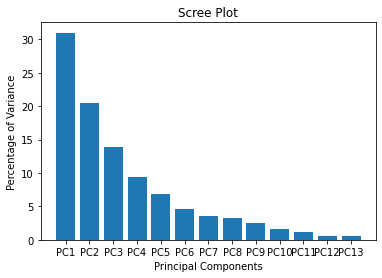

In [151]:
b_structure
pca_var=np.round(pca.explained_variance_ratio_* 100, decimals=1 )
labels = ['PC'+ str(s) for s in range(1, len(pca_var)+1)]

plt.bar(x= range(1, len(pca_var)+1), height = pca_var, tick_label= labels)
plt.ylabel("Percentage of Variance")
plt.xlabel("Principal Components")
plt.title("Scree Plot")
plt.show()

In [48]:
      #ESTA ES CON UNA SOLA      
import math 

edgesx = cv2.Sobel(imgleft, -1, dx=1, dy=0, ksize=1)
edgesy = cv2.Sobel(imgleft, -1, dx=0, dy=1, ksize=1)



output = np.zeros((len(edgesx),len(edgesx[0])))
for i in range(0, len(edgesx)):
    for j in range(0, len(edgesx[0])):
        output[i][j] = math.sqrt(pow(edgesx[i][j],2) +pow(edgesy[i][j],2)+ pow(-1,2))


angle = np.zeros((len(edgesx),len(edgesx[0]),3))  
for i in range(0, len(edgesx)):
    for j in range(0, len(edgesx[0])):
        pos =np.array([edgesx[i][j], edgesy[i][j], -1]/output[i][j])
        angle[i][j] = pos

beta = np.array([0,0,1])
        
coff = np.zeros((len(edgesx),len(edgesx[0])))
for i in range(0, len(edgesx)):
    for j in range(0, len(edgesx[0])):
        coff[i][j] = 1- np.dot(angle[i][j],beta)

coeff_average = coff.mean()
coeff_sum = coff.sum()

partial_sumx = []
for i in range(0, len(edgesx)):#losy0debencambiarse arriba
    partial_sumx.append(coff[i]*(left_cheek_y0+i))

partial_sumy = []
for i in range(0, len(edgesx[0])):#losy0debencambiarse arriba
    partial_sumy.append(coff[:,i]*(left_cheek_x0+i))
        
center_of_massx = np.asarray(partial_sumx).sum()/coeff_sum
center_of_massy = np.asarray(partial_sumy).sum()/coeff_sum


IndentationError: unindent does not match any outer indentation level (<ipython-input-48-f35130b63526>, line 12)